In [29]:
import numpy as np
import math
from scipy.optimize import linear_sum_assignment as magyar

import matplotlib.pyplot as plt

In [81]:
a = np.array([1, 2, 2, 4, 5])
b = np.array([1, 3, 2, 4, 5])
c = np.array([0, 1, 4, 5, 6])
means = np.array([a, c, b])

candidate_1 = np.array([1, 2, 2, 4, 5])
candidate_2 = np.array([1, 3, 2, 4, 5])
candidate_3 = np.array([0, 1, 4, 5, 6])
candidate_4 = np.array([0, 1.1, 4, 5, 6])
candidates = np.array([candidate_1, candidate_2, candidate_4, candidate_3])

In [57]:
def calculate_rbf(point_1, point_2, sigma=1):
    result = 0
    for i_rbf in range(point_1.shape[0]):
        result += math.exp(-((point_1[i_rbf] - point_2[i_rbf])**2)/(2*sigma**2))
    return result

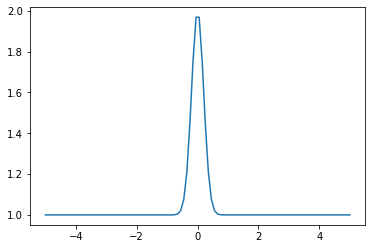

In [38]:
x = np.linspace(-5, 5, 100)
y = []
for val in x:
    y.append(calculate_rbf(np.zeros(2), np.array([0, val]), 0.2))

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

In [86]:
# cost matrix calculation
def calculate_cost_of_observation(map_points, candidates, sigma=1):
    cost = np.empty((map_points.shape[0], candidates.shape[0])) # map points(rows) x candidate points(columns)
    for i, map_point in enumerate(map_points):
        for j, candidate_point in enumerate(candidates):
            cost[i][j] = -calculate_rbf(candidate_point, map_point, sigma) #negative
    print(cost)
    return cost

In [87]:
magyar(calculate_cost_of_observation(means, candidates))

[[-5.         -4.60653066 -2.62190407 -2.56145792]
 [-2.56145792 -2.09026255 -4.99501248 -5.        ]
 [-4.60653066 -5.         -2.11940172 -2.09026255]]


(array([0, 1, 2]), array([0, 3, 1]))